In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns


pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000
plt.rc('font', family='NanumBarunGothic')

# 1인가구 특화범죄 데이터 전처리

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/전처리 완료한 엑셀 결과물/너때문에 죽겠다 다신 만나지 말자_3탄.xlsx')
df1= df.iloc[0:, 1:]
df1
# print(df1.columns)
log = df1[['침입방법문단속', '침입방법시정장치', '침입방법시정장치파손', '침입방법문파손', '침입방법기타']]
df1

,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율,5개년 총합,5개년 평균,1인가구수,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타,총합,평균,로그_총계,로그_평균
0,14.02,11.27,16.06,512.94,13.06,3.85,8.58,10.04,10.76,46.50,28.21,23.11,2.18,47587731.5,9517546.3,1229421,4935,3450,4835,810,1312260,1326290,265258,14.10,12.49
1,10.14,10.36,12.06,512.70,9.71,0.50,6.62,8.72,7.41,25.70,42.63,28.64,3.03,723038.0,144607.6,25326,215,95,185,10,73715,74220,14844,11.21,9.61
2,9.94,11.11,11.88,510.24,9.78,0.57,6.34,8.86,7.75,50.25,29.12,17.12,3.50,604216.5,120843.3,20803,150,45,15,45,46545,46800,9360,10.75,9.14
3,10.44,10.86,12.38,516.20,9.62,0.41,9.15,9.80,6.50,38.70,37.81,22.11,1.38,1091535.0,218307.0,34240,90,40,10,5,41210,41355,8271,10.63,9.02
4,10.61,11.42,12.54,510.95,9.36,0.15,9.45,9.84,0.00,56.43,31.21,9.77,2.59,1457994.5,291598.9,40706,115,80,30,0,35260,35485,7097,10.48,8.87
5,10.94,11.52,12.62,516.12,9.81,0.60,10.16,10.24,6.22,22.24,46.69,27.88,3.19,1717817.5,343563.5,56337,400,430,1005,145,48170,50150,10030,10.82,9.21
6,10.93,11.70,12.84,504.09,9.74,0.53,8.73,9.72,7.52,45.75,37.82,13.41,3.02,1689643.5,337928.7,55593,330,90,110,15,50195,50740,10148,10.83,9.23
7,10.80,11.60,12.94,505.31,9.86,0.65,10.02,10.02,8.11,33.84,41.12,22.67,2.37,1954514.5,390902.9,49207,110,60,130,35,48205,48540,9708,10.79,9.18
8,10.92,11.40,13.02,516.10,9.52,0.31,10.88,9.79,8.13,44.77,33.52,19.26,2.45,2150314.0,430062.8,55136,350,185,220,20,43935,44710,8942,10.71,9.10
9,10.62,11.10,12.86,512.42,9.63,0.42,8.42,9.95,6.95,26.94,37.58,33.79,1.69,1525381.0,305076.2,40872,170,125,85,10,43005,43395,8679,10.68,9.07


In [ ]:
log = np.log(log).round(2)
log

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타
0,8.50,8.15,8.48,6.70,14.09
1,5.37,4.55,5.22,2.30,11.21
2,5.01,3.81,2.71,3.81,10.75
3,4.50,3.69,2.30,1.61,10.63
4,4.74,4.38,3.40,-inf,10.47
5,5.99,6.06,6.91,4.98,10.78
6,5.80,4.50,4.70,2.71,10.82
7,4.70,4.09,4.87,3.56,10.78
8,5.86,5.22,5.39,3.00,10.69
9,5.14,4.83,4.44,2.30,10.67


In [ ]:
# log.isnull()
log = log.replace(-np.inf, 0)
log

,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타
0,8.50,8.15,8.48,6.70,14.09
1,5.37,4.55,5.22,2.30,11.21
2,5.01,3.81,2.71,3.81,10.75
3,4.50,3.69,2.30,1.61,10.63
4,4.74,4.38,3.40,0.00,10.47
5,5.99,6.06,6.91,4.98,10.78
6,5.80,4.50,4.70,2.71,10.82
7,4.70,4.09,4.87,3.56,10.78
8,5.86,5.22,5.39,3.00,10.69
9,5.14,4.83,4.44,2.30,10.67


In [ ]:
df2 = df1[['1인가구', '인구 밀도', '고령인구수', '여성인구비', '5대 범죄발생 수', '범죄율', '유흥업소비', '치안시설비',
       'cctv', '아파트 비율', '단독주택 비율', '연립/다세대 비율', '비거주용 주거 비율', '침입방법문단속', '침입방법시정장치', '침입방법시정장치파손', '침입방법문파손',
       '침입방법기타']]

In [ ]:
a = df2[['1인가구', '인구 밀도', '고령인구수', '여성인구비', '5대 범죄발생 수', '범죄율', '유흥업소비', '치안시설비',
       'cctv', '아파트 비율', '단독주택 비율', '연립/다세대 비율', '비거주용 주거 비율']]
dff = pd.concat([df['지역구'], a, log, df[['로그_총계', '로그_평균']]], axis=1).iloc[1:,:]
dff

,지역구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타,로그_총계,로그_평균
1,종로구,10.14,10.36,12.06,512.70,9.71,0.50,6.62,8.72,7.41,25.70,42.63,28.64,3.03,5.37,4.55,5.22,2.30,11.21,11.21,9.61
2,중구,9.94,11.11,11.88,510.24,9.78,0.57,6.34,8.86,7.75,50.25,29.12,17.12,3.50,5.01,3.81,2.71,3.81,10.75,10.75,9.14
3,용산구,10.44,10.86,12.38,516.20,9.62,0.41,9.15,9.80,6.50,38.70,37.81,22.11,1.38,4.50,3.69,2.30,1.61,10.63,10.63,9.02
4,성동구,10.61,11.42,12.54,510.95,9.36,0.15,9.45,9.84,0.00,56.43,31.21,9.77,2.59,4.74,4.38,3.40,0.00,10.47,10.48,8.87
5,광진구,10.94,11.52,12.62,516.12,9.81,0.60,10.16,10.24,6.22,22.24,46.69,27.88,3.19,5.99,6.06,6.91,4.98,10.78,10.82,9.21
6,동대문구,10.93,11.70,12.84,504.09,9.74,0.53,8.73,9.72,7.52,45.75,37.82,13.41,3.02,5.80,4.50,4.70,2.71,10.82,10.83,9.23
7,중랑구,10.80,11.60,12.94,505.31,9.86,0.65,10.02,10.02,8.11,33.84,41.12,22.67,2.37,4.70,4.09,4.87,3.56,10.78,10.79,9.18
8,성북구,10.92,11.40,13.02,516.10,9.52,0.31,10.88,9.79,8.13,44.77,33.52,19.26,2.45,5.86,5.22,5.39,3.00,10.69,10.71,9.10
9,강북구,10.62,11.10,12.86,512.42,9.63,0.42,8.42,9.95,6.95,26.94,37.58,33.79,1.69,5.14,4.83,4.44,2.30,10.67,10.68,9.07
10,도봉구,10.34,11.30,12.86,511.97,9.26,0.05,9.71,10.45,6.82,51.58,21.89,25.38,1.16,2.30,4.55,2.71,0.00,10.29,10.29,8.68


In [ ]:
# dff.to_excel("강사님과함께2.xlsx")

# 전처리 완료한 데이터 EDA

In [9]:
dff = pd.read_excel('/content/drive/MyDrive/GoH project/검증 데이터 만들기/전처리 완료한 엑셀 결과물/강사님과함께2.xlsx')
dff = dff.iloc[:, 1:]
dff.columns

# 범죄간의 상관관계
dff2 = dff[[ '5대 범죄발생 수', '범죄율', '1인가구', '인구 밀도', '고령인구수', '여성인구비','유흥업소비',
       '치안시설비', 'cctv', '아파트 비율', '단독주택 비율', '연립/다세대 비율', '비거주용 주거 비율',
       '침입방법문단속', '침입방법시정장치', '침입방법시정장치파손', '침입방법문파손', '침입방법기타']]

In [11]:
dff2.describe()

,5대 범죄발생 수,범죄율,1인가구,인구 밀도,고령인구수,여성인구비,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.801600,0.591200,10.745200,11.300800,12.794400,512.412400,8.956400,10.004000,7.070000,45.462800,29.406000,22.940400,2.190800,5.109600,4.722400,4.582800,2.638800,10.822800
std,0.278488,0.278528,0.348833,0.316464,0.336441,7.626067,1.162128,0.430968,1.620429,13.597231,10.281357,7.454385,1.055501,0.728609,0.618212,1.237812,1.401836,0.295769
min,9.260000,0.050000,9.940000,10.360000,11.880000,494.090000,6.340000,8.720000,0.000000,22.240000,10.750000,8.870000,0.910000,2.300000,3.690000,2.300000,0.000000,10.290000
25%,9.620000,0.410000,10.610000,11.170000,12.720000,507.470000,8.390000,9.850000,6.820000,34.780000,21.840000,19.260000,1.530000,4.870000,4.250000,3.810000,2.300000,10.670000
50%,9.780000,0.570000,10.800000,11.340000,12.860000,512.700000,8.990000,10.060000,7.480000,47.270000,31.040000,22.810000,2.040000,5.140000,4.650000,4.550000,2.710000,10.760000
75%,9.970000,0.760000,10.940000,11.510000,13.010000,516.620000,9.450000,10.260000,7.750000,54.140000,37.580000,27.880000,2.450000,5.540000,5.080000,5.390000,3.560000,10.920000
max,10.470000,1.260000,11.630000,11.800000,13.220000,527.630000,11.610000,10.680000,8.730000,79.470000,47.700000,40.540000,5.950000,6.110000,6.140000,6.910000,5.080000,11.670000


array([[<Axes: title={'center': '5대 범죄발생 수'}>,
        <Axes: title={'center': '범죄율'}>,
        <Axes: title={'center': '1인가구'}>,
        <Axes: title={'center': '인구 밀도'}>],
       [<Axes: title={'center': '고령인구수'}>,
        <Axes: title={'center': '여성인구비'}>,
        <Axes: title={'center': '유흥업소비'}>,
        <Axes: title={'center': '치안시설비'}>],
       [<Axes: title={'center': 'cctv'}>,
        <Axes: title={'center': '아파트 비율'}>,
        <Axes: title={'center': '단독주택 비율'}>,
        <Axes: title={'center': '연립/다세대 비율'}>],
       [<Axes: title={'center': '비거주용 주거 비율'}>,
        <Axes: title={'center': '침입방법문단속'}>,
        <Axes: title={'center': '침입방법시정장치'}>,
        <Axes: title={'center': '침입방법시정장치파손'}>],
       [<Axes: title={'center': '침입방법문파손'}>,
        <Axes: title={'center': '침입방법기타'}>, <Axes: >, <Axes: >]],
      dtype=object)

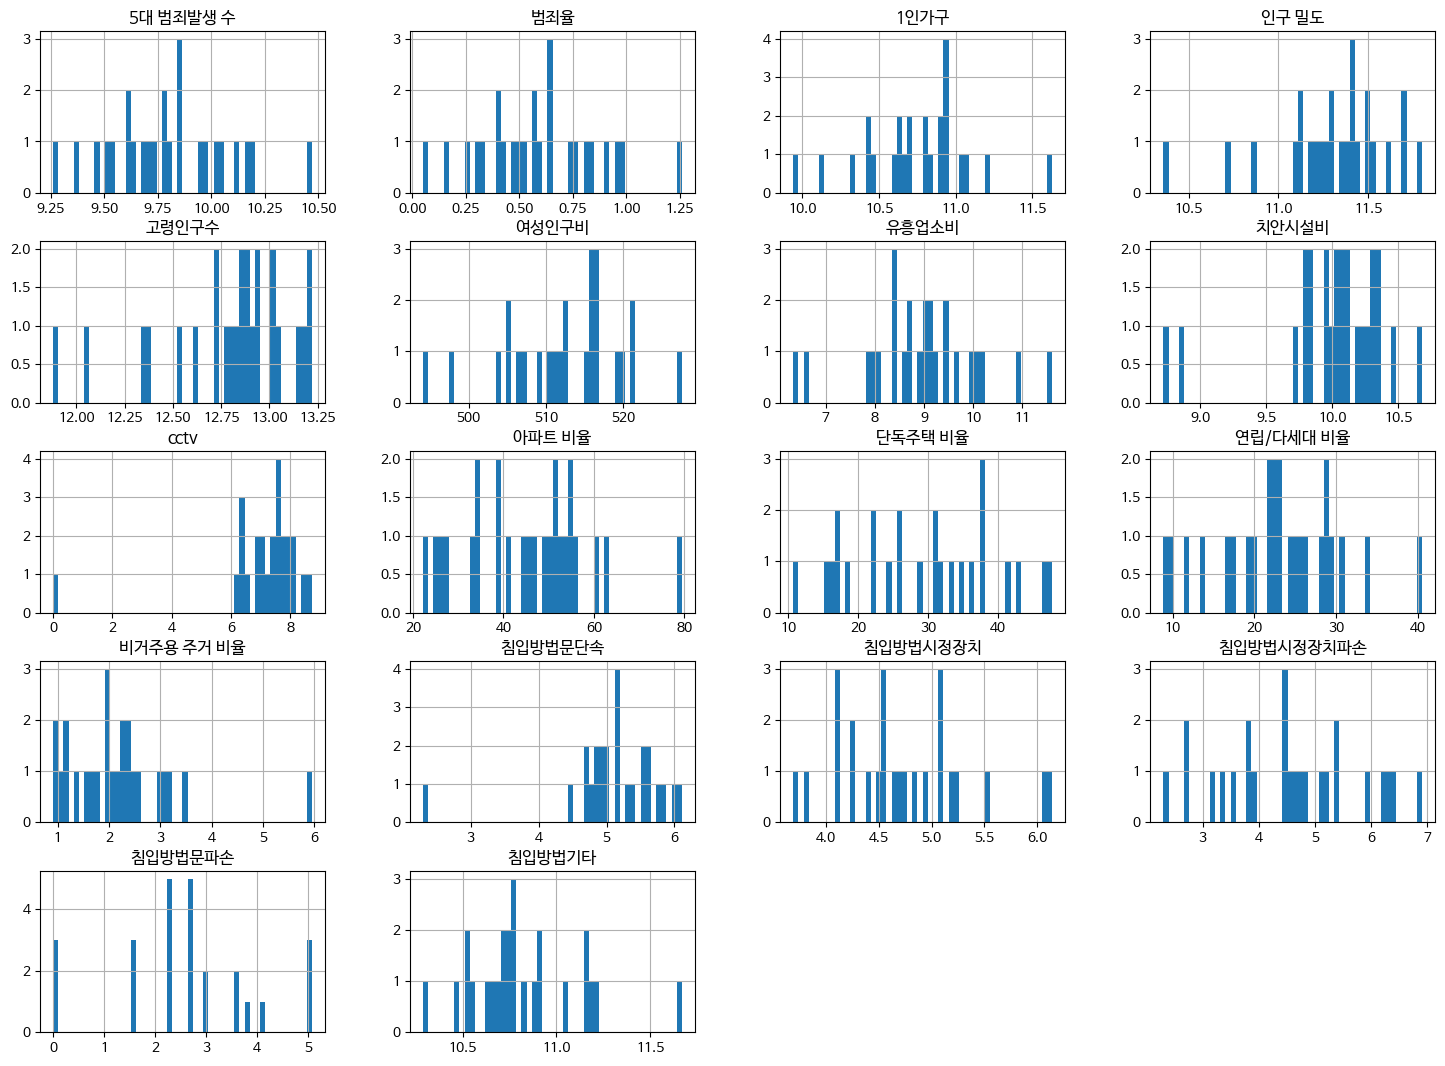

In [12]:
dff2.hist(bins=50, figsize=(18,13))

이상치: 침입방법시문단속 >= 0, 침입방법기타 >=11.5

In [13]:
dff2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5대 범죄발생 수   25 non-null     float64
 1   범죄율         25 non-null     float64
 2   1인가구        25 non-null     float64
 3   인구 밀도       25 non-null     float64
 4   고령인구수       25 non-null     float64
 5   여성인구비       25 non-null     float64
 6   유흥업소비       25 non-null     float64
 7   치안시설비       25 non-null     float64
 8   cctv        25 non-null     float64
 9   아파트 비율      25 non-null     float64
 10  단독주택 비율     25 non-null     float64
 11  연립/다세대 비율   25 non-null     float64
 12  비거주용 주거 비율  25 non-null     float64
 13  침입방법문단속     25 non-null     float64
 14  침입방법시정장치    25 non-null     float64
 15  침입방법시정장치파손  25 non-null     float64
 16  침입방법문파손     25 non-null     float64
 17  침입방법기타      25 non-null     float64
dtypes: float64(18)
memory usage: 3.6 KB


In [14]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
dff2.isnull().sum()

5대 범죄발생 수     0
범죄율           0
1인가구          0
인구 밀도         0
고령인구수         0
여성인구비         0
유흥업소비         0
치안시설비         0
cctv          0
아파트 비율        0
단독주택 비율       0
연립/다세대 비율     0
비거주용 주거 비율    0
침입방법문단속       0
침입방법시정장치      0
침입방법시정장치파손    0
침입방법문파손       0
침입방법기타        0
dtype: int64

In [ ]:
dff[dff['침입방법문단속'] <= 3]

,지역구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타
9,도봉구,10.34,11.3,12.86,511.97,9.26,0.05,9.71,10.45,6.82,51.58,21.89,25.38,1.16,2.3,4.55,2.71,0.0,10.29


In [ ]:
dff[dff['침입방법시정장치'] <= 4]

,지역구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타
1,중구,9.94,11.11,11.88,510.24,9.78,0.57,6.34,8.86,7.75,50.25,29.12,17.12,3.50,5.01,3.81,2.71,3.81,10.75
2,용산구,10.44,10.86,12.38,516.20,9.62,0.41,9.15,9.80,6.50,38.70,37.81,22.11,1.38,4.50,3.69,2.30,1.61,10.63


In [ ]:
dff[dff['침입방법시정장치'] >= 6]

,지역구,1인가구,인구 밀도,고령인구수,여성인구비,5대 범죄발생 수,범죄율,유흥업소비,치안시설비,cctv,아파트 비율,단독주택 비율,연립/다세대 비율,비거주용 주거 비율,침입방법문단속,침입방법시정장치,침입방법시정장치파손,침입방법문파손,침입방법기타
4,광진구,10.94,11.52,12.62,516.12,9.81,0.60,10.16,10.24,6.22,22.24,46.69,27.88,3.19,5.99,6.06,6.91,4.98,10.78
15,강서구,11.20,11.17,13.20,516.62,10.02,0.81,8.39,10.68,7.59,51.73,16.37,30.86,1.04,5.16,6.14,6.26,2.71,11.04


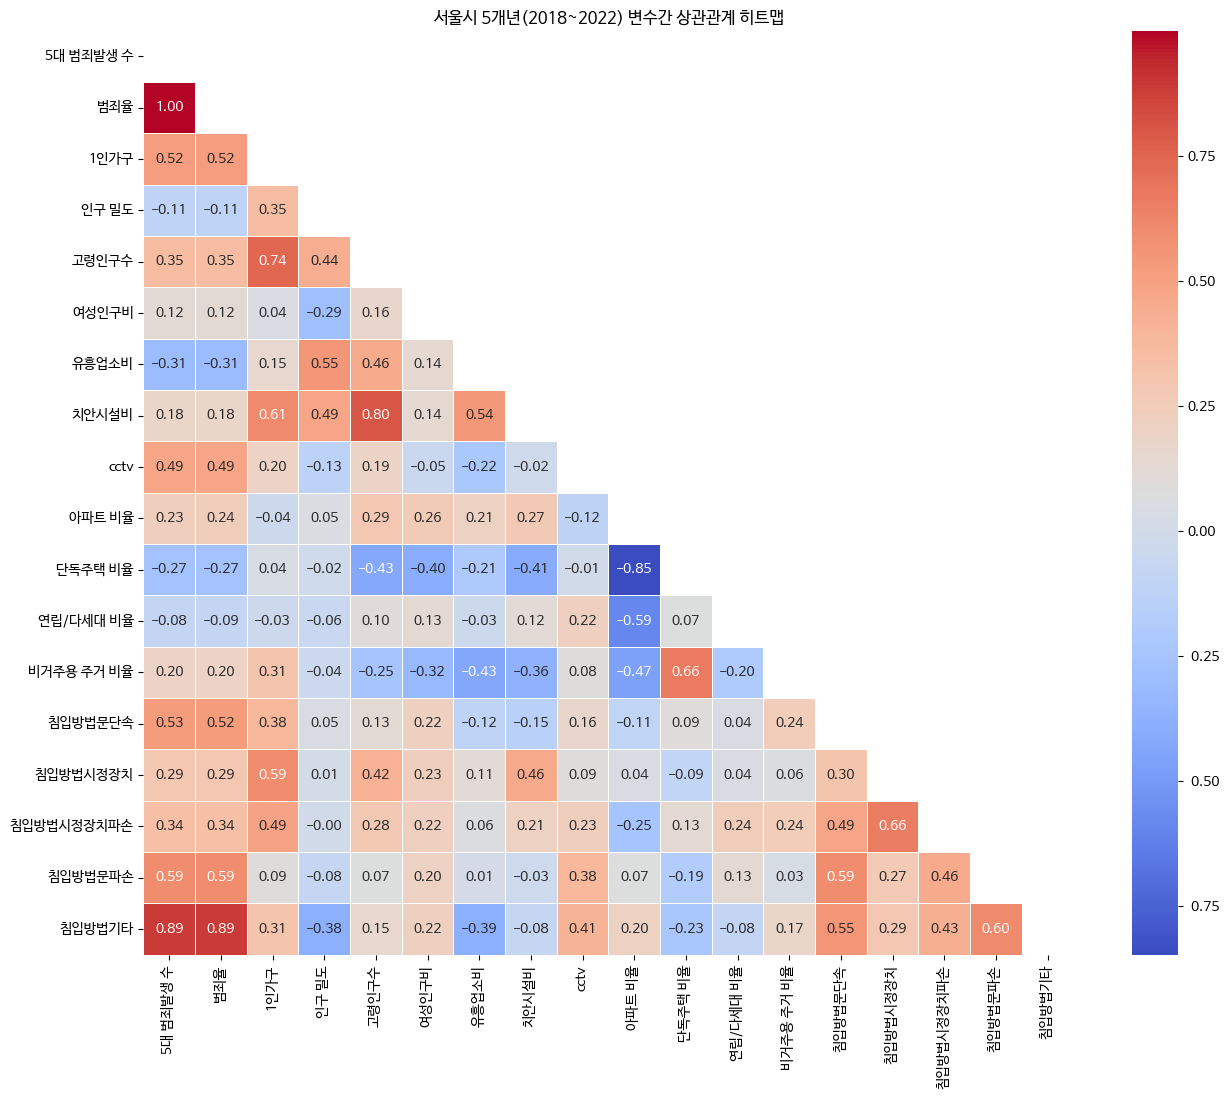

In [17]:
# 상관관계 계산
corr_matrix = dff2.corr()

# 삼각형 부분을 가리기 위한 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 시각화
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('서울시 5개년(2018~2022) 변수간 상관관계 히트맵')
plt.show()

In [ ]:
# 1인가구와 상관관계가 높은 독립 변수들
corr_matrix.sort_values(by='1인가구', ascending=False)[['1인가구']]

,1인가구
1인가구,1.000000
고령인구수,0.742978
치안시설비,0.606914
침입방법시정장치,0.589855
5대 범죄발생 수,0.521678
범죄율,0.521369
침입방법시정장치파손,0.491225
침입방법문단속,0.384638
인구 밀도,0.353131
침입방법기타,0.311422


* 1인 가구에 영향을 미치는 요소로, 고령인구, 5대범죄뿐만 아니라, 1인가구에 취약한 주거 침입도 유의미한 관계가 있음을 확인함

In [ ]:
# q.to_excel('1인가구와 변수 간 상관관계.xlsx')